### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

### Reading data

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_folder =os.path.join(parent_dir,"data")
pwd = (os.path.join(data_folder,"synthetic_hostel_data.csv"))
df = pd.read_csv(pwd)
df.head()

,Location,Tv,Air_conditioner,Refrigerator,Water_heater,Modern_Wardrobe,Back_up_power_supply,Gym,Elevator,Modernized_bathrooms,Room size,Number of people in a room,Historical pricing data,Current Price
0,Kotei,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,3,3,4120,5768.0
1,Ayeduase,No,Yes,No,Yes,No,Yes,Yes,No,Yes,4,4,3030,4545.0
2,Bomsu,Yes,No,Yes,Yes,No,Yes,No,Yes,No,2,2,4610,5071.0
3,Bomsu,Yes,No,Yes,No,Yes,No,No,No,No,2,2,4240,4664.0
4,Kotei,Yes,No,No,Yes,Yes,No,No,Yes,No,4,4,2900,4060.0


In [3]:
boolean_columns = ['Tv', 'Air_conditioner', 'Refrigerator', 'Water_heater',
                   'Modern_Wardrobe', 'Back_up_power_supply', 'Gym', 'Elevator',
                   'Modernized_bathrooms']

df[boolean_columns] = df[boolean_columns].applymap(lambda x: True if x == 'Yes' else False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17312\656472114.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[boolean_columns] = df[boolean_columns].applymap(lambda x: True if x == 'Yes' else False)


In [4]:
df.head()

,Location,Tv,Air_conditioner,Refrigerator,Water_heater,Modern_Wardrobe,Back_up_power_supply,Gym,Elevator,Modernized_bathrooms,Room size,Number of people in a room,Historical pricing data,Current Price
0,Kotei,False,True,True,True,True,False,False,True,True,3,3,4120,5768.0
1,Ayeduase,False,True,False,True,False,True,True,False,True,4,4,3030,4545.0
2,Bomsu,True,False,True,True,False,True,False,True,False,2,2,4610,5071.0
3,Bomsu,True,False,True,False,True,False,False,False,False,2,2,4240,4664.0
4,Kotei,True,False,False,True,True,False,False,True,False,4,4,2900,4060.0


### Exploratory analysis 

<Axes: >

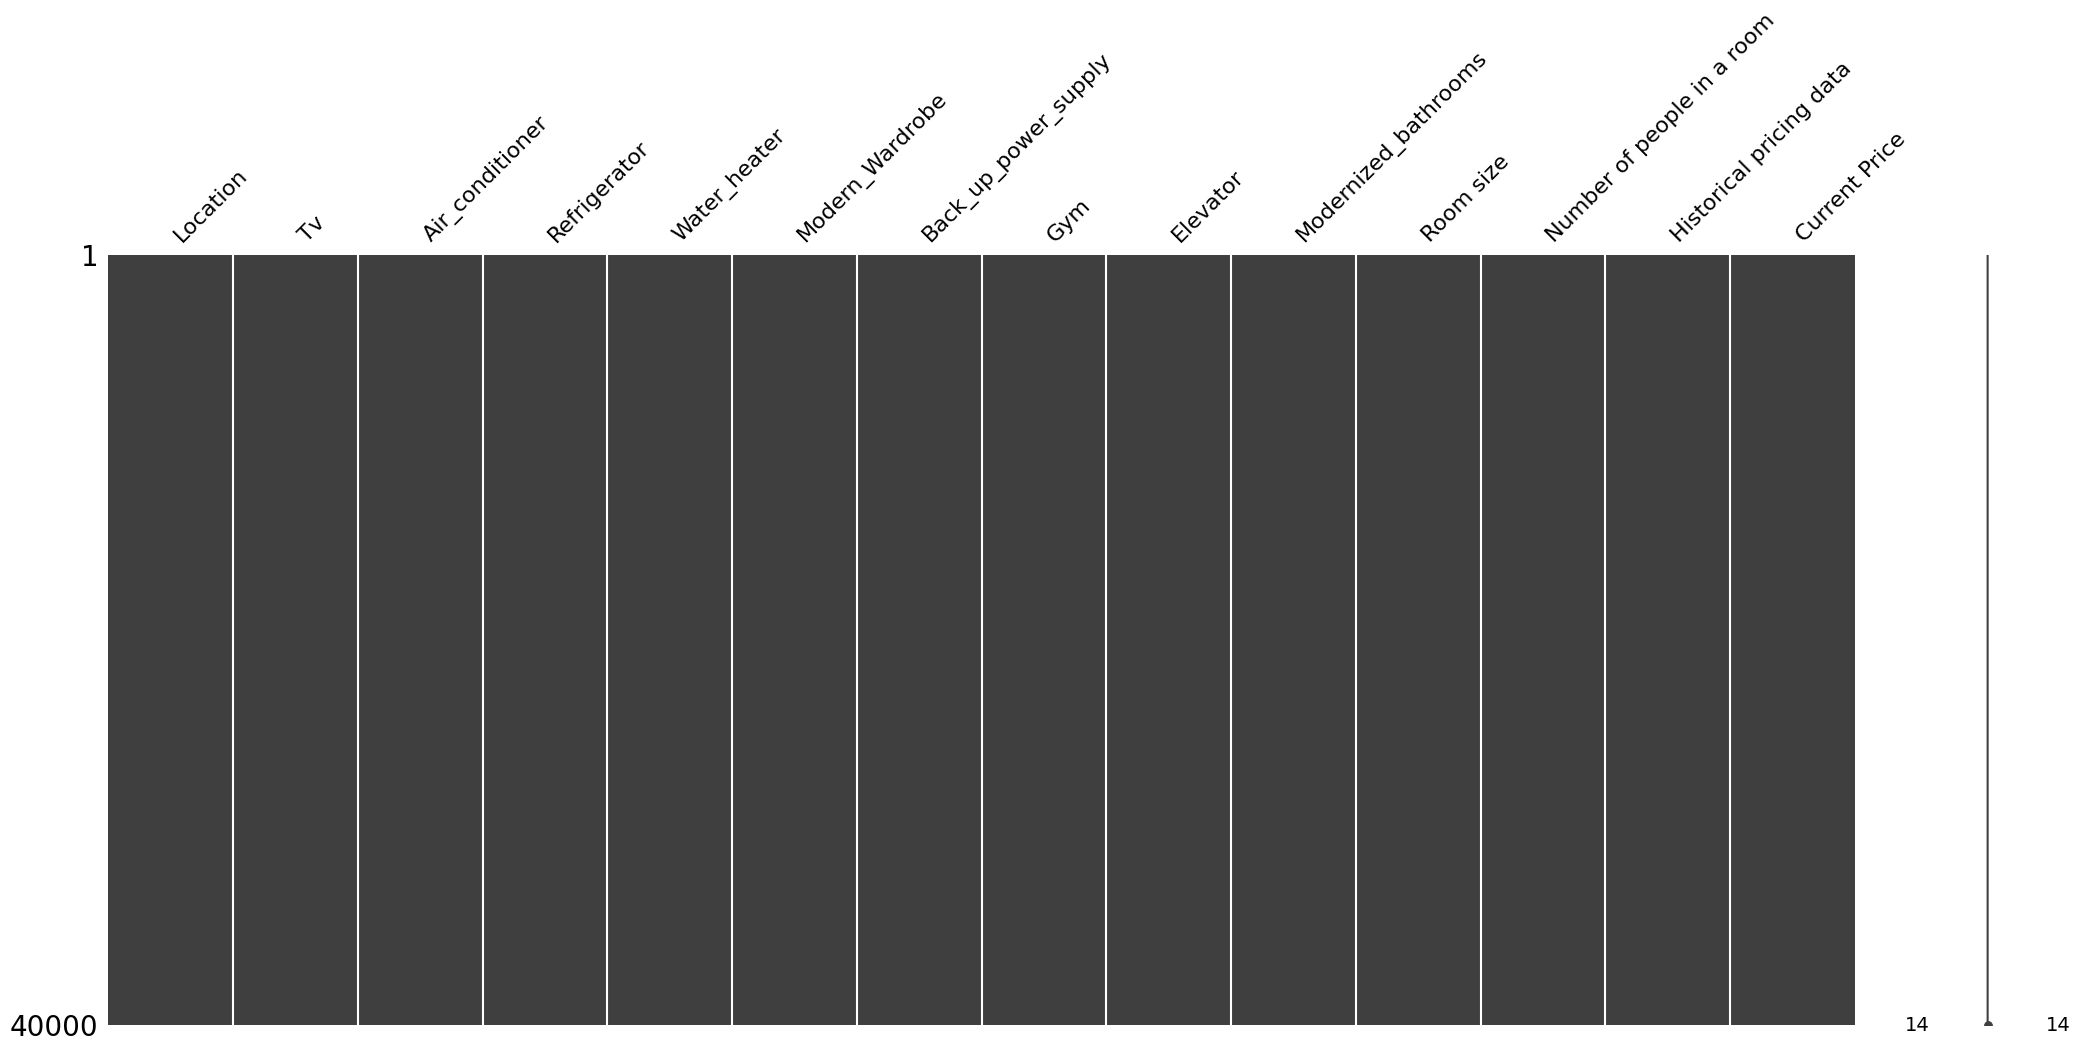

In [5]:
msno.matrix(df)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    40000 non-null  object 
 1   Tv                          40000 non-null  bool   
 2   Air_conditioner             40000 non-null  bool   
 3   Refrigerator                40000 non-null  bool   
 4   Water_heater                40000 non-null  bool   
 5   Modern_Wardrobe             40000 non-null  bool   
 6   Back_up_power_supply        40000 non-null  bool   
 7   Gym                         40000 non-null  bool   
 8   Elevator                    40000 non-null  bool   
 9   Modernized_bathrooms        40000 non-null  bool   
 10  Room size                   40000 non-null  int64  
 11  Number of people in a room  40000 non-null  int64  
 12  Historical pricing data     40000 non-null  int64  
 13  Current Price               400

In [6]:
df.describe()

,Room size,Number of people in a room,Historical pricing data,Current Price
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.500375,2.500375,4482.606250,5940.571300
std,1.115361,1.115361,1281.635851,1868.401207
min,1.000000,1.000000,2500.000000,2750.000000
25%,2.000000,2.000000,3560.000000,4499.000000
50%,2.000000,2.000000,4230.000000,5590.000000
75%,3.000000,3.000000,4870.000000,7062.000000
max,4.000000,4.000000,6970.000000,11152.000000


In [19]:
df.columns

Index(['Location', 'Tv', 'Air_conditioner', 'Refrigerator', 'Water_heater',
       'Modern_Wardrobe', 'Back_up_power_supply', 'Gym', 'Elevator',
       'Modernized_bathrooms', 'Room size', 'Number of people in a room',
       'Historical pricing data', 'Current Price'],
      dtype='object')

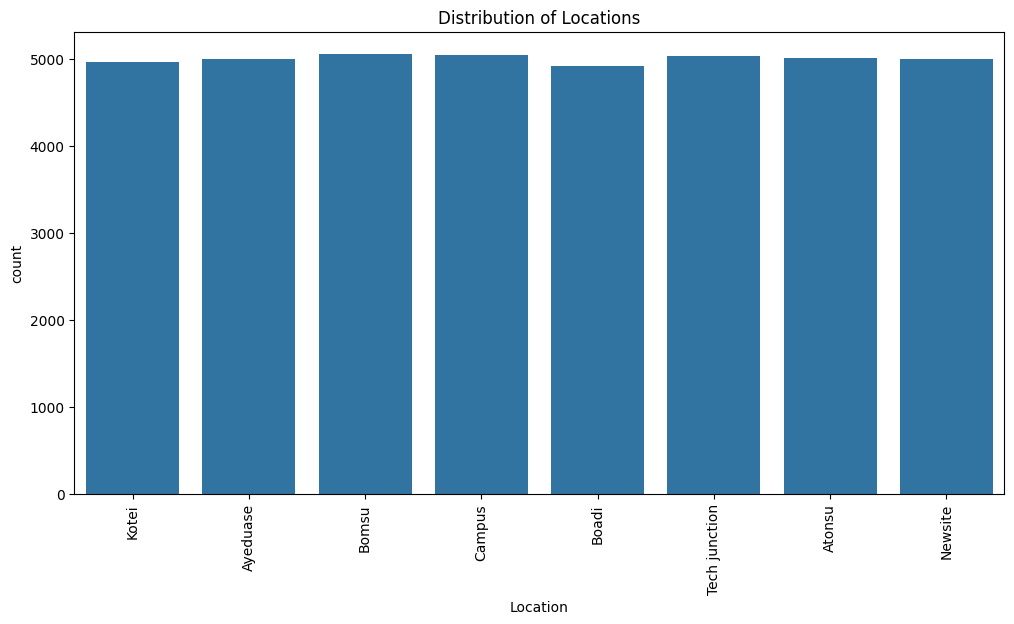

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribution of Locations')
plt.xticks(rotation=90)
plt.show()

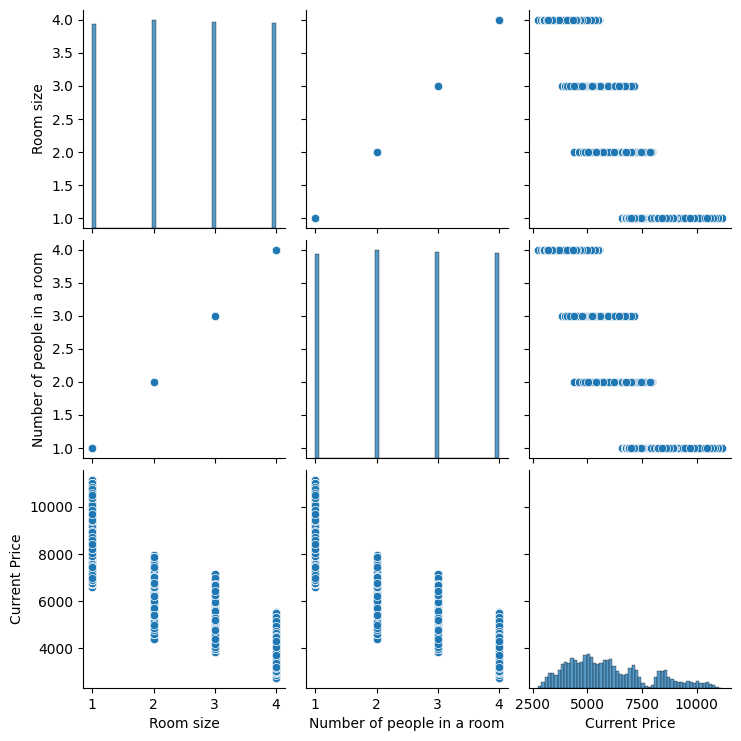

In [8]:
sns.pairplot(df[['Room size', 'Number of people in a room', 'Current Price']])
plt.show()

##### Observation
From the pairplot we can see the roomsize and the number of people in a room are the same, so we have to drop one of them

In [14]:
df = df.drop('Number of people in a room', axis = 1)

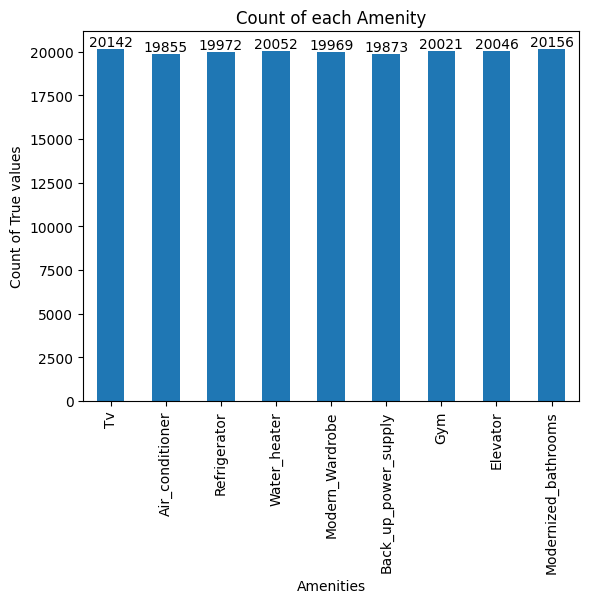

In [20]:
amenities_counts = df[boolean_columns].sum()

ax = amenities_counts.plot(kind='bar')
plt.xlabel('Amenities')
plt.ylabel('Count of True values')
plt.title('Count of each Amenity')

for i, v in enumerate(amenities_counts):
    ax.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.show()

##### Encode data

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [6]:
df_encoded.head()

,Tv,Air_conditioner,Refrigerator,Water_heater,Modern_Wardrobe,Back_up_power_supply,Gym,Elevator,Modernized_bathrooms,Room size,Number of people in a room,Historical pricing data,Current Price,Location_Ayeduase,Location_Boadi,Location_Bomsu,Location_Campus,Location_Kotei,Location_Newsite,Location_Tech junction
0,False,True,True,True,True,False,False,True,True,3,3,4120,5768.0,False,False,False,False,True,False,False
1,False,True,False,True,False,True,True,False,True,4,4,3030,4545.0,True,False,False,False,False,False,False
2,True,False,True,True,False,True,False,True,False,2,2,4610,5071.0,False,False,True,False,False,False,False
3,True,False,True,False,True,False,False,False,False,2,2,4240,4664.0,False,False,True,False,False,False,False
4,True,False,False,True,True,False,False,True,False,4,4,2900,4060.0,False,False,False,False,True,False,False


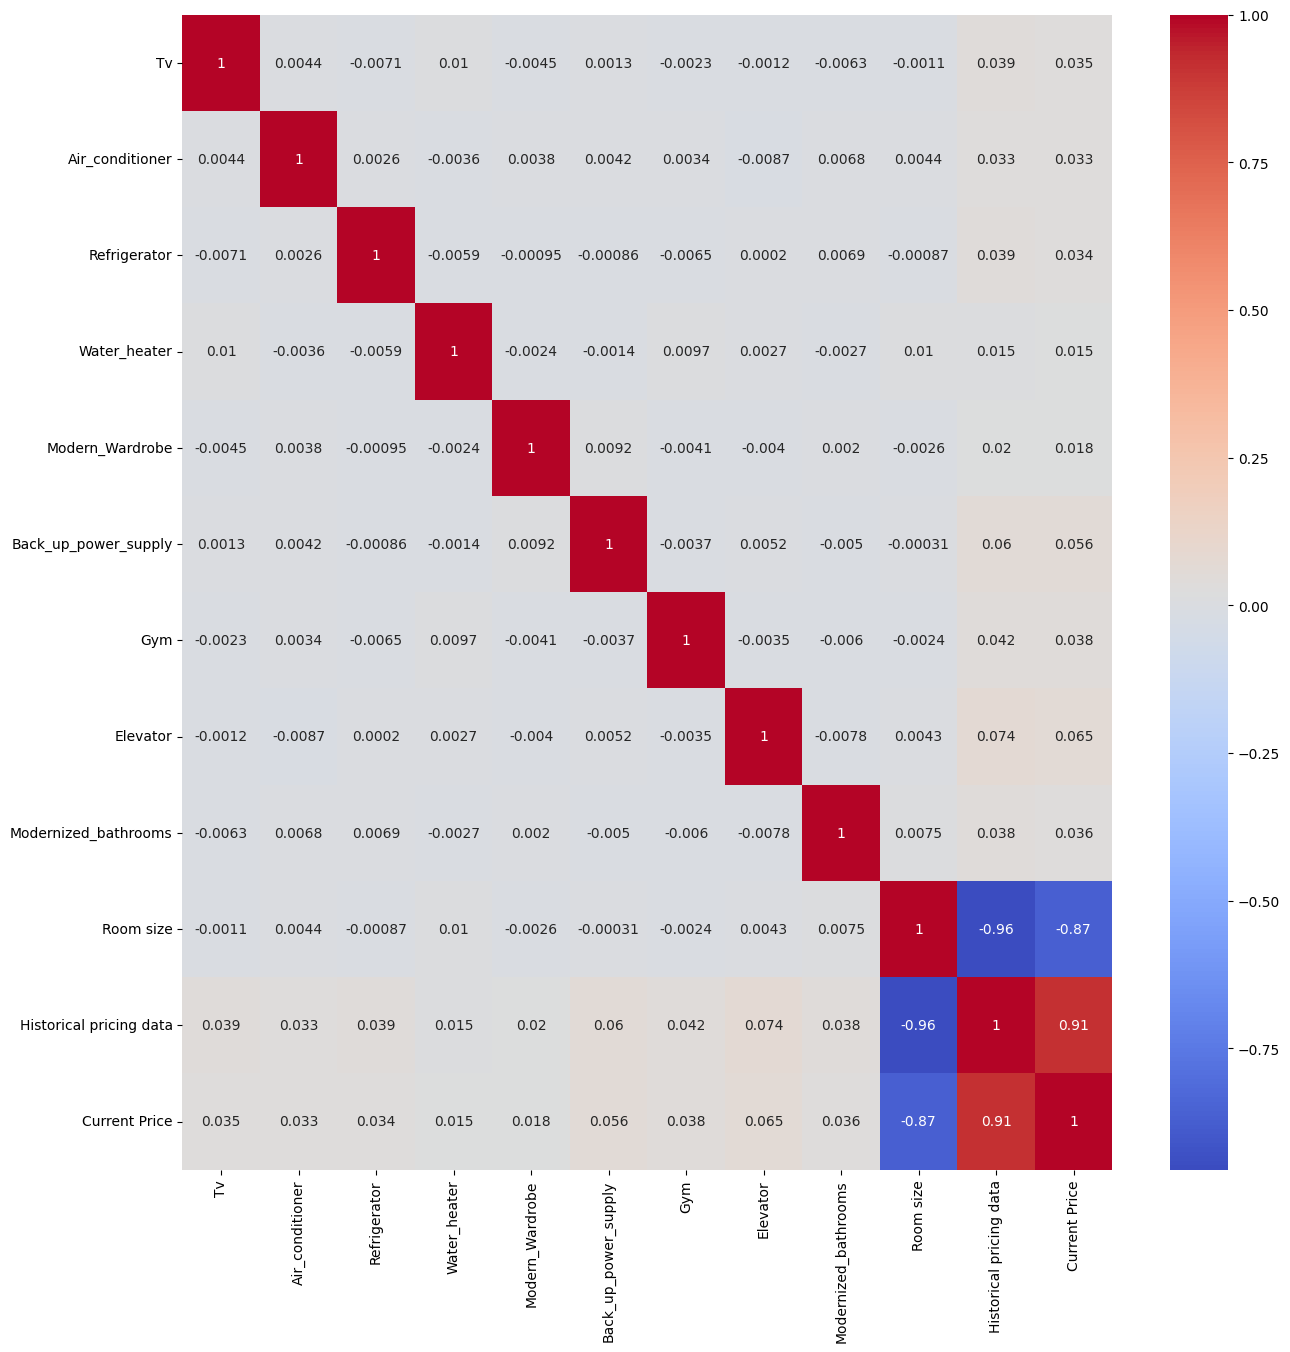

In [33]:
num_df = df[boolean_columns + ['Room size', 'Historical pricing data', 'Current Price']]
corr = num_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [37]:
sorted_corr = corr['Current Price'].sort_values(ascending=False)
sorted_corr

Current Price              1.000000
Historical pricing data    0.912154
Elevator                   0.064918
Back_up_power_supply       0.055535
Gym                        0.037905
Modernized_bathrooms       0.036401
Tv                         0.035258
Refrigerator               0.034443
Air_conditioner            0.032613
Modern_Wardrobe            0.018351
Water_heater               0.014957
Room size                 -0.871177
Name: Current Price, dtype: float64

In [38]:
df_encoded.columns

,Tv,Air_conditioner,Refrigerator,Water_heater,Modern_Wardrobe,Back_up_power_supply,Gym,Elevator,Modernized_bathrooms,Room size,Historical pricing data,Current Price,Location_Ayeduase,Location_Boadi,Location_Bomsu,Location_Campus,Location_Kotei,Location_Newsite,Location_Tech junction
0,False,True,True,True,True,False,False,True,True,3,4120,5768.0,False,False,False,False,True,False,False
1,False,True,False,True,False,True,True,False,True,4,3030,4545.0,True,False,False,False,False,False,False
2,True,False,True,True,False,True,False,True,False,2,4610,5071.0,False,False,True,False,False,False,False
3,True,False,True,False,True,False,False,False,False,2,4240,4664.0,False,False,True,False,False,False,False
4,True,False,False,True,True,False,False,True,False,4,2900,4060.0,False,False,False,False,True,False,False


In [7]:
columns_to_include = [column for column in df_encoded.columns if column not in ["Historical pricing data", "Current Price"]]
columns_to_include.append("Historical pricing data")
columns_to_include.append("Current Price")

# Create the new DataFrame
df_encoded = df_encoded[columns_to_include]

##### Importing Sklearn packages

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

#### Spliting data into train and test data

In [18]:
y = df_encoded['Current Price']
X = df_encoded.drop('Current Price', axis = 1)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

#### Linear Regression

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
actual_val = y_test[:10]
predicted_val = lm.predict(X_test[:10])

comp_df = pd.DataFrame(data={"Actual Values":actual_val, "Predicted Values":predicted_val})
comp_df["Differences"] = comp_df["Actual Values"] - comp_df["Predicted Values"]
comp_df

,Actual Values,Predicted Values,Differences
32823,4672.0,5107.098518,-435.098518
16298,7536.0,7470.294910,65.705090
28505,7552.0,7485.678645,66.321355
6689,4640.0,5084.377923,-444.377923
26893,7155.0,7095.573883,59.426117
36572,4720.0,5143.320036,-423.320036
12335,5835.0,5935.047384,-100.047384
29591,4199.0,4164.173993,34.826007
18948,5343.0,5329.421042,13.578958
31067,4354.0,4457.866047,-103.866047


In [34]:
y_pred = lm.predict(X_test)

lm_r2 = r2_score(y_test,y_pred)
lm_rmse = root_mean_squared_error(y_test, y_pred)
lm_mae = mean_absolute_error(y_test,y_pred)

print(f"The r2 score : {lm_r2}")
print(f"The root mean squared error : {lm_rmse}")
print(f"The mean absolute error : {lm_mae}")

The r2 score : 0.9875838077999473
The root mean squared error : 208.92055445742886
The mean absolute error : 133.55022436992874


#### XGBoost model

In [37]:
from xgboost import XGBRegressor

In [38]:
xgb = XGBRegressor(objective='reg:squarederror',
                   n_estimators=500, 
                   max_depth=6, 
                   learning_rate=0.1, 
                   random_state=42)


xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
actual_val = y_test[:10]
predicted_val = xgb.predict(X_test[:10])

comp_df = pd.DataFrame(data={"Actual Values":actual_val, "Predicted Values":predicted_val})
comp_df["Differences"] = comp_df["Actual Values"] - comp_df["Predicted Values"]
comp_df

,Actual Values,Predicted Values,Differences
32823,4672.0,4674.169434,-2.169434
16298,7536.0,7532.237793,3.762207
28505,7552.0,7547.860840,4.139160
6689,4640.0,4641.405273,-1.405273
26893,7155.0,7170.752930,-15.752930
36572,4720.0,4722.177734,-2.177734
12335,5835.0,5837.065430,-2.065430
29591,4199.0,4197.515137,1.484863
18948,5343.0,5342.648438,0.351562
31067,4354.0,4357.694336,-3.694336


In [40]:
y_pred = xgb.predict(X_test)

xgb_r2 = r2_score(y_test,y_pred)
xgb_rmse = root_mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test,y_pred)

print(f"The r2 score : {xgb_r2}")
print(f"The root mean squared error : {xgb_rmse}")
print(f"The mean absolute error : {xgb_mae}")

The r2 score : 0.9999930599630736
The root mean squared error : 4.93932777486093
The mean absolute error : 2.757926544189452


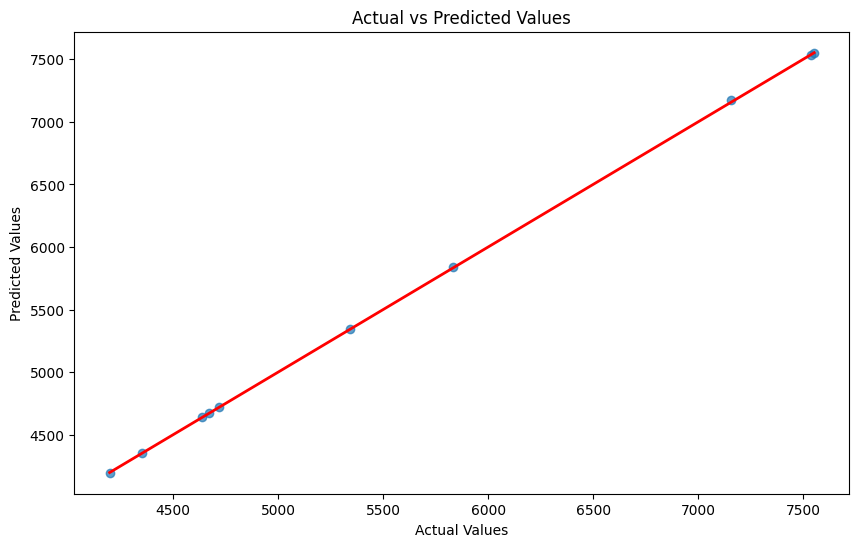

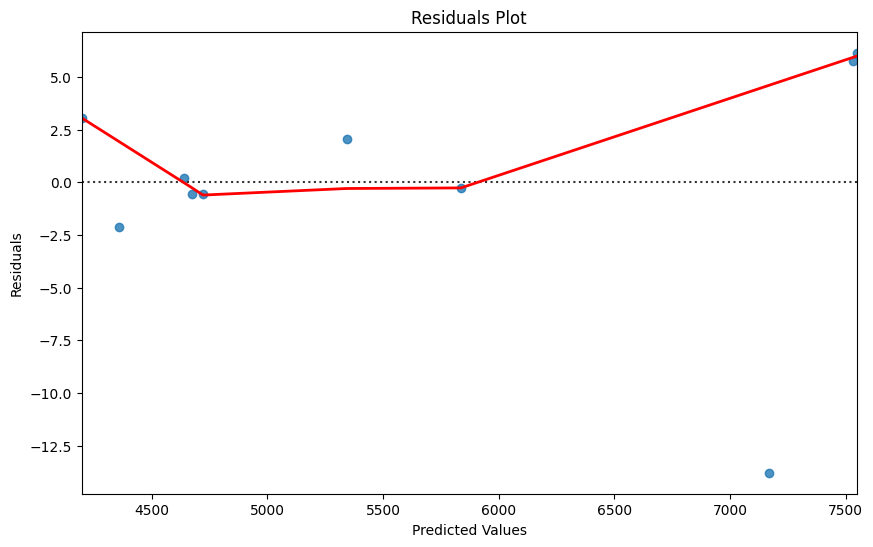

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(comp_df['Actual Values'], comp_df['Predicted Values'], alpha=0.7)
plt.plot([min(comp_df['Actual Values']), max(comp_df['Actual Values'])], 
         [min(comp_df['Actual Values']), max(comp_df['Actual Values'])], 
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Residuals plot
residuals = comp_df['Differences']
plt.figure(figsize=(10, 6))
sns.residplot(x=comp_df['Predicted Values'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#### Fine tune XGB Regressor

In [44]:
xgb = XGBRegressor(objective="reg:squarederror", random_state = 42)

param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[3,6,9],
    'learning_rate':[0.01,0.1,0.2],
}

grid_search = GridSearchCV(estimator = xgb , param_grid = param_grid, cv=5, scoring = 'r2', n_jobs = -1)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_ 
best_score = grid_search.best_score_

In [45]:
print(f"Best parameters: {best_params}")
print(f"Best cross-validation R2 score: {best_score}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
Best cross-validation R2 score: 0.9999975617706861


In [48]:
final_model= grid_search.best_estimator_
y_pred = final_model.predict(X_test)

In [49]:
final_r2 = r2_score(y_test,y_pred)
final_rmse = root_mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test,y_pred)

print(f"The r2 score : {final_r2}")
print(f"The root mean squared error : {final_rmse}")
print(f"The mean absolute error : {final_mae}")

The r2 score : 0.9999989553637894
The root mean squared error : 1.9163264515199334
The mean absolute error : 0.3966220092773418


In [64]:
feature_importance = final_model.feature_importances_

feature_names = df_encoded.columns[:-1] 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance.round(3)
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [65]:
importance_df

,Feature,Importance
9,Room size,0.904
14,Location_Campus,0.033
11,Location_Ayeduase,0.019
13,Location_Bomsu,0.014
18,Historical pricing data,0.014
16,Location_Newsite,0.012
15,Location_Kotei,0.005
5,Back_up_power_supply,0.000
6,Gym,0.000
7,Elevator,0.000
